### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/ames_prices.csv')
df.head(2)

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [8]:
## Grab two numeric variables
df = df.loc[:,['price', 'Lot.Frontage']] # Filter on the columns we'll use
df = df.dropna() # Drop missing values
df = df.reset_index() # Reset the row index; I hate pandas
y = df['price']
x = df['Lot.Frontage']

/tmp/ipykernel_30586/1908465332.py:27: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den # Compute y_hat(z)


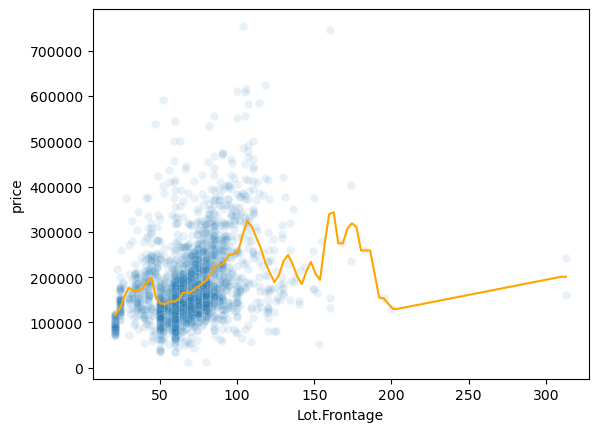

In [9]:
## Create a grid of "x" values:
grid = np.linspace( x.min(), x.max(), 100)

## Number of observations:
N = len(x)

## Bandwidth:
h = 1.06 * np.std(x) * N**(-0.2)

## Kernel function:
def kernel(u):
    '''Epanechnikov, for variety.'''
    k = .75 * (1-u**2) * int( np.abs(u) <= 1)
    return k

# %%

# LCLS Regression:
cef = [] # Save values for the CEF
for z in grid: # For each grid value
    num = 0 # Start with the numerator sum = 0
    den = 0 # Start with the denominator sum = 0
    for i, data in enumerate(x): # For each data point
        k_data = kernel( (z-data)/h )/(N*h) # Compute kernel weight
        den += k_data # Add to denominator
        num += y[i] * k_data # Multiple by y value, add to numerator
    y_hat_z = num/den # Compute y_hat(z)
    cef.append(y_hat_z) # Add to the CEF


sns.scatterplot(y=y,x=x,alpha = .1)
sns.lineplot(x=grid,y=cef,color='orange')
plt.show()